<a href="https://colab.research.google.com/github/rajputvishwesh/Team-Notebook-Capstone-Project-/blob/main/GTA_CAPSTONE_PROJECT(FINAL_NOTEBOOK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Terrorism is a form of violence that seeks to achieve political, ideological, or religious goals through the use of fear, intimidation, and violence. It is a global problem that affects people from all walks of life and all parts of the world. While acts of terrorism have been committed throughout history, the term "terrorism" has become more widely used since the 1970s to describe a specific type of violent activity.**

## **Explore and analyze the data to discover results and statistics for different terrorist attacks across the world.**


## **Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px

### **Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Specifying the path and importing the data and also defining the dataframe**

In [ ]:
path = "/content/drive/MyDrive/Global Terrorism Data.csv"
gta_df = pd.read_csv(path , encoding="ISO-8859-1")



### **Studying the data by performing some operations**

In [ ]:
gta_df.head().T

,0,1,2,3,4
eventid,197000000001,197000000002,197001000001,197001000002,197001000003
iyear,1970,1970,1970,1970,1970
imonth,7,0,1,1,1
iday,2,0,0,0,0
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,0,-9,-9,-9
INT_IDEO,0,1,-9,-9,-9
INT_MISC,0,1,1,1,1
INT_ANY,0,1,1,1,1


In [ ]:
gta_df.tail().T

,181686,181687,181688,181689,181690
eventid,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,2017,2017,2017,2017,2017
imonth,12,12,12,12,12
iday,31,31,31,31,31
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,-9,0,-9,-9
INT_IDEO,0,-9,0,-9,-9
INT_MISC,0,1,0,0,0
INT_ANY,0,1,0,-9,-9


In [ ]:
gta_df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

# **Understanding the Data**

In [ ]:
gta_df.shape


(181691, 135)

In [ ]:
gta_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns
gta_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [ ]:
#Extracting Necessary Columns
gta_df=gta_df[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
       ,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive','success','multiple']]

In [ ]:
#Seeing First few Entries
gta_df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,...,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive,success,multiple
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN,1,0.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN,1,0.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN,1,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN,1,0.0


In [ ]:
gta_df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded,success,multiple
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000,181691.000000,181690.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668,0.889598,0.137773
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392,0.313391,0.344663
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000,1.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,1.000000,1.000000


# **Performing Data Analysis**

## Number of Global Attacks per year

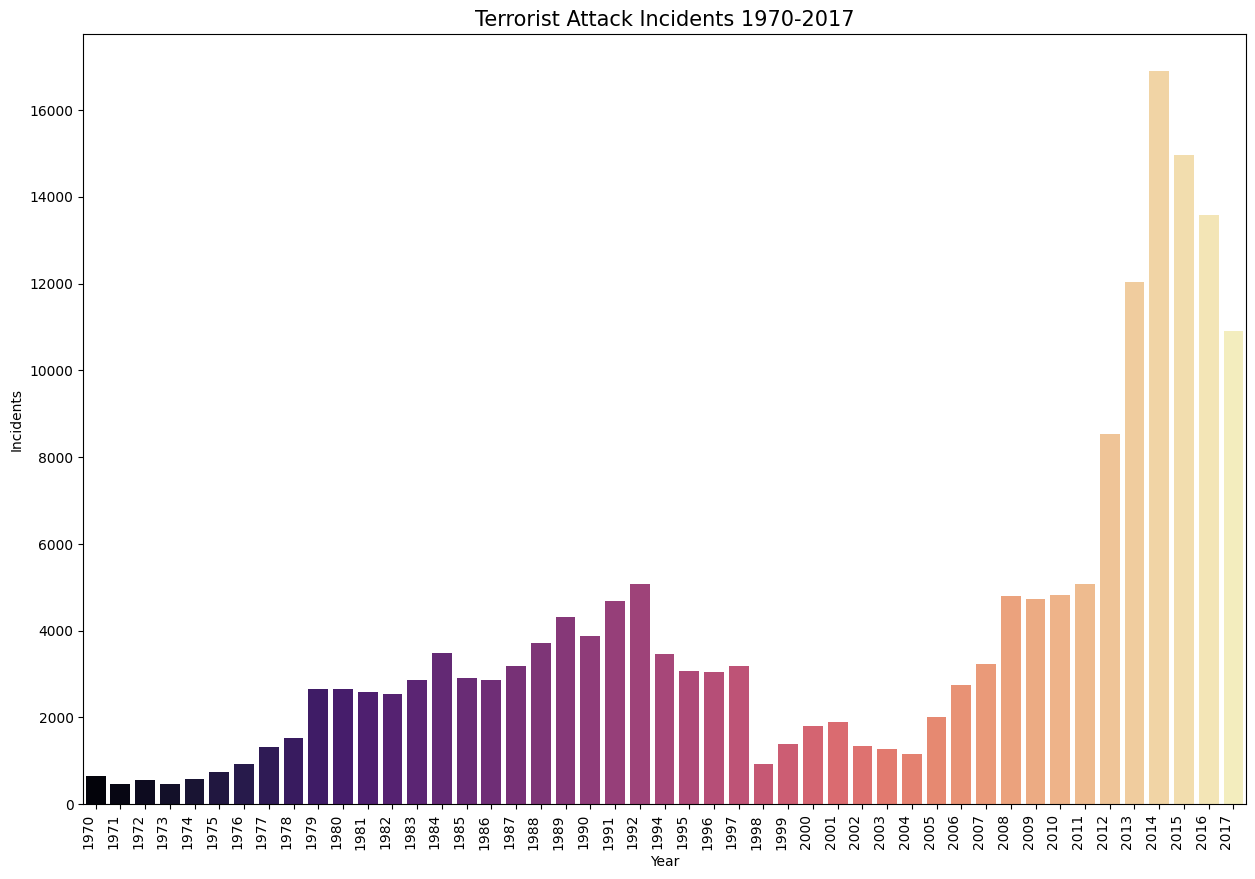

In [ ]:
# Create the figure and set its size
plt.figure(figsize=(15,10))

# Create the countplot with custom color and palette
v_ = sns.countplot(x='Year', data=gta_df, palette='magma', color='blue')

# Rotate and align x-axis labels
v_.set_xticklabels(v_.get_xticklabels(), rotation=90, ha="right")

# Add a title to the plot
plt.title('Terrorist Attack Incidents 1970-2017', size=15)

# Add a y-axis label
plt.ylabel('Incidents')

# Display the plot
plt.show()


We can observe from this bar graph that there is a sharp increase in terrorist attacks after 1978, and after that there is somewhat mixed level of increment and decrement till 2010 but after that there is an exponential type of growth in the terrorist attacks which reached its peak in 2014.

## **Types of Terrorist Attack**

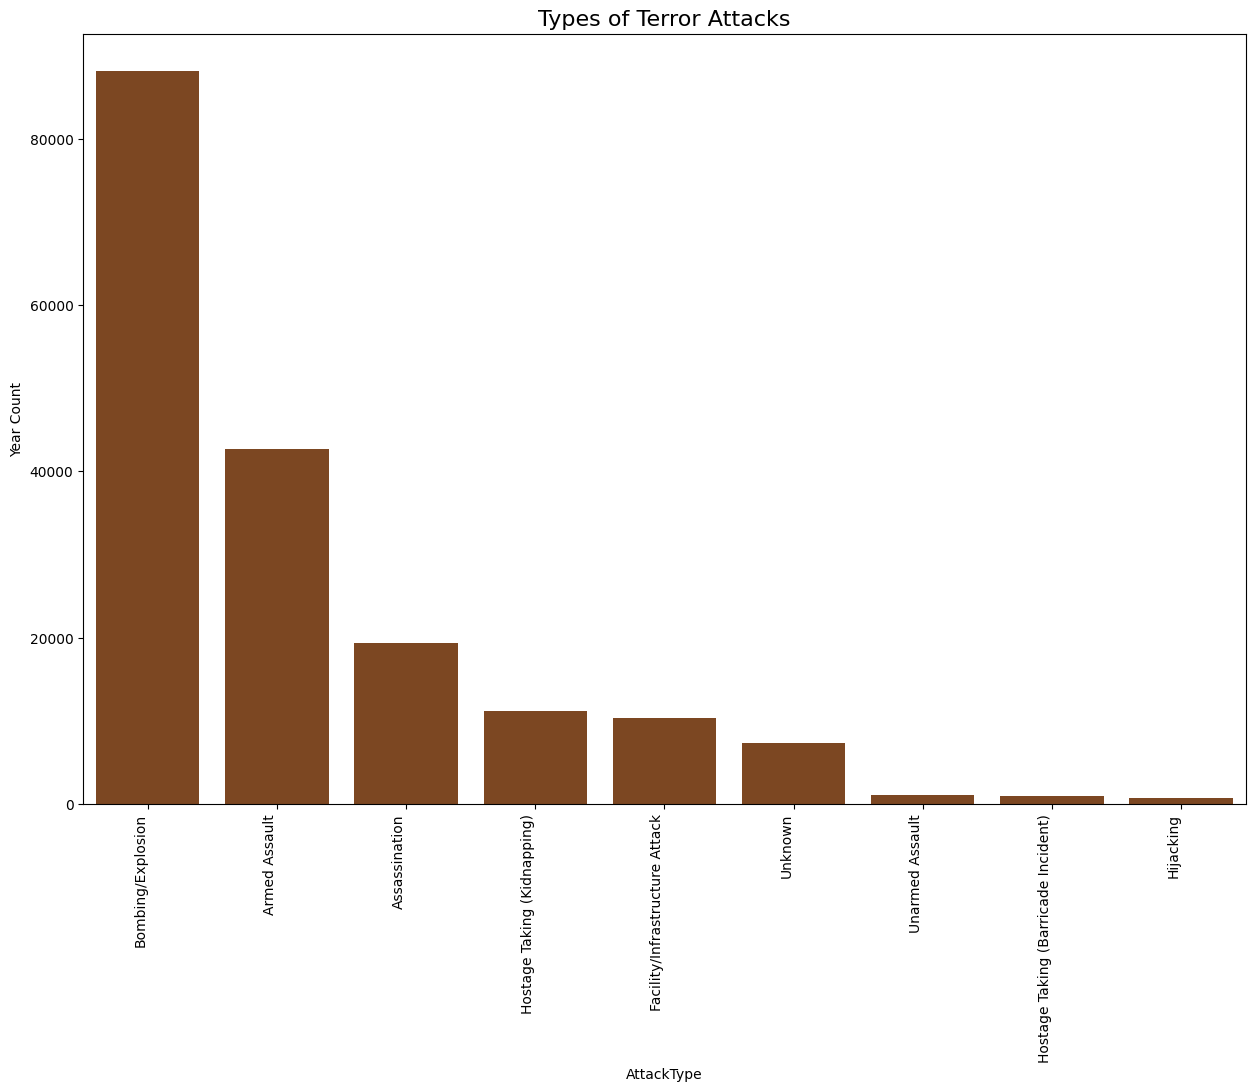

In [ ]:
# Define a custom color for the countplot

custom_color = '#8B4513'  # Replace with the desired color code for brown

# Create the figure and set its size
plt.figure(figsize=(15,10))

# Create the countplot with custom color, order, and palette
v_ = sns.countplot(x='AttackType', data=gta_df, palette=[custom_color], 
                   order=gta_df['AttackType'].value_counts().index)

# Rotate and align x-axis labels
v_.set_xticklabels(v_.get_xticklabels(), rotation=90, ha="right")

# Add a title to the plot
plt.title('Types of Terror Attacks', size=16)

# Add a y-axis label
plt.ylabel('Year Count')

# Display the plot
plt.show()


So, as we know that bombing is the most easy method to wreak havoc at a place and which is also evident from this graph that terrorists have done most number of bombing attacks followed by Armed Assault and Assassination and since they need a lot of planning and also the success rate of pulling of Hijacking successfully is low and hence terrorist have preffered Hijacking least which is also evident from the graph.

## **Global bombings**

Text(-3.6805555555555483, 0.5, 'Incidents')

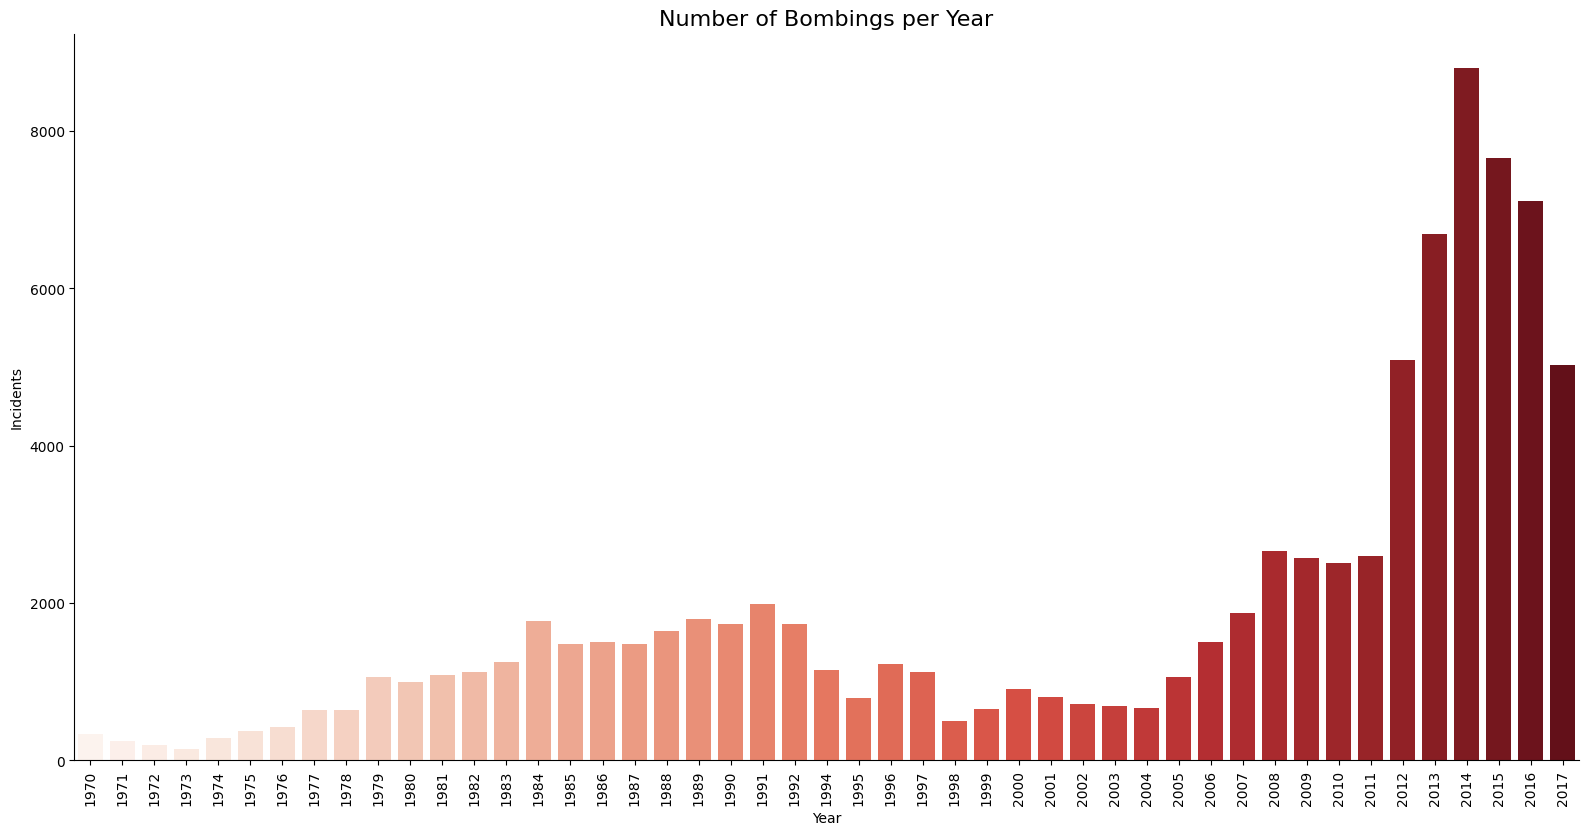

In [ ]:
# Filter the dataframe to only include bombings
bombings = gta_df[gta_df['AttackType'] == 'Bombing/Explosion']

# Create a bar chart showing the number of bombings per year
sns.catplot(
    x='Year',
    data=bombings,
    kind='count',
    height=8,
    aspect=2,
    palette='Reds'
)
plt.xticks(rotation=90)
plt.title('Number of Bombings per Year', size=16)
plt.ylabel('Incidents')


We can analyse here from this graph that the number of bombings follow a mixed trend of increment and decrement till 2011, but after that there is an exponential growth in the bombings till 2017 which achieves its peak in 2014.

## **Attacks by Region**

Text(0, 0.5, 'Number of Attacks')

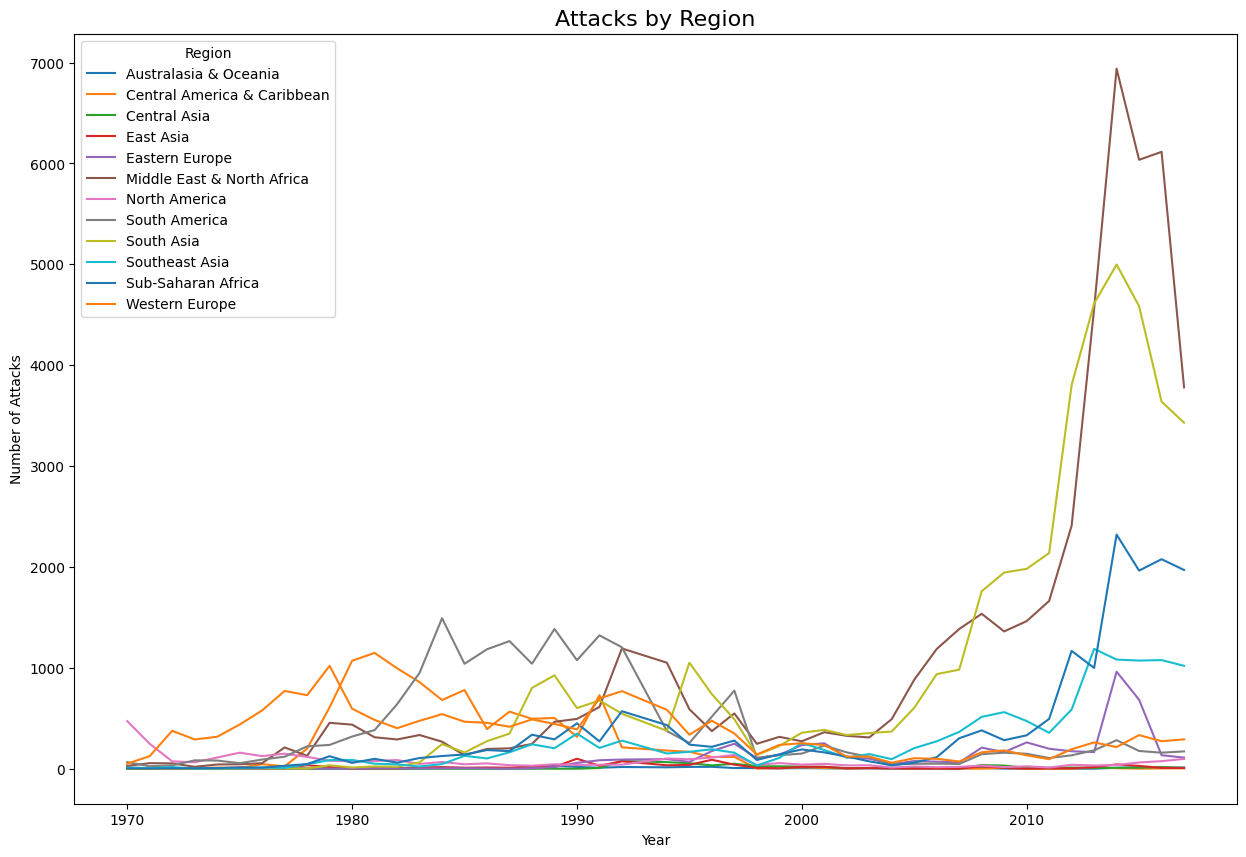

In [ ]:
# Create a cross-tabulation of attacks by year and region, and plot it as a bar chart
attacks_by_region = pd.crosstab(gta_df.Year, gta_df.Region)
attacks_by_region.plot(figsize=(15,10))

# Add a title and y-axis label to the plot
plt.title('Attacks by Region', size=16)
plt.ylabel('Number of Attacks')


Here we can observe from this graph that there is a mix trend in number of attack in nearly every country but the graph takes an exponential growth since 2003 , and also we can analyse that the most vulnerable countries has been Middle East and North Africa followed by South Asia

## **Target Type of Plot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution'),
  Text(10, 0, 'Government (Diplomatic)'),
  Text(11, 0, 'Terrorists/Non-State Militia'),
  Text(12, 0, 'Journalists & Media'),
  Text(13, 0, 'Violent Political Party'),
  Text(14, 0, 'Airports & Aircraft'),
  Text(15, 0, 'Telecommunication'),
  Text(16, 0, 'NGO'),
  Text(17, 0, 'Tourists'),
  Text(18, 0, 'Maritime'),
  Text(19, 0, 'Food or Water Supply'),
  Text(20, 0, 'Abortion Related'),
  Text(21, 0, 'Other')])

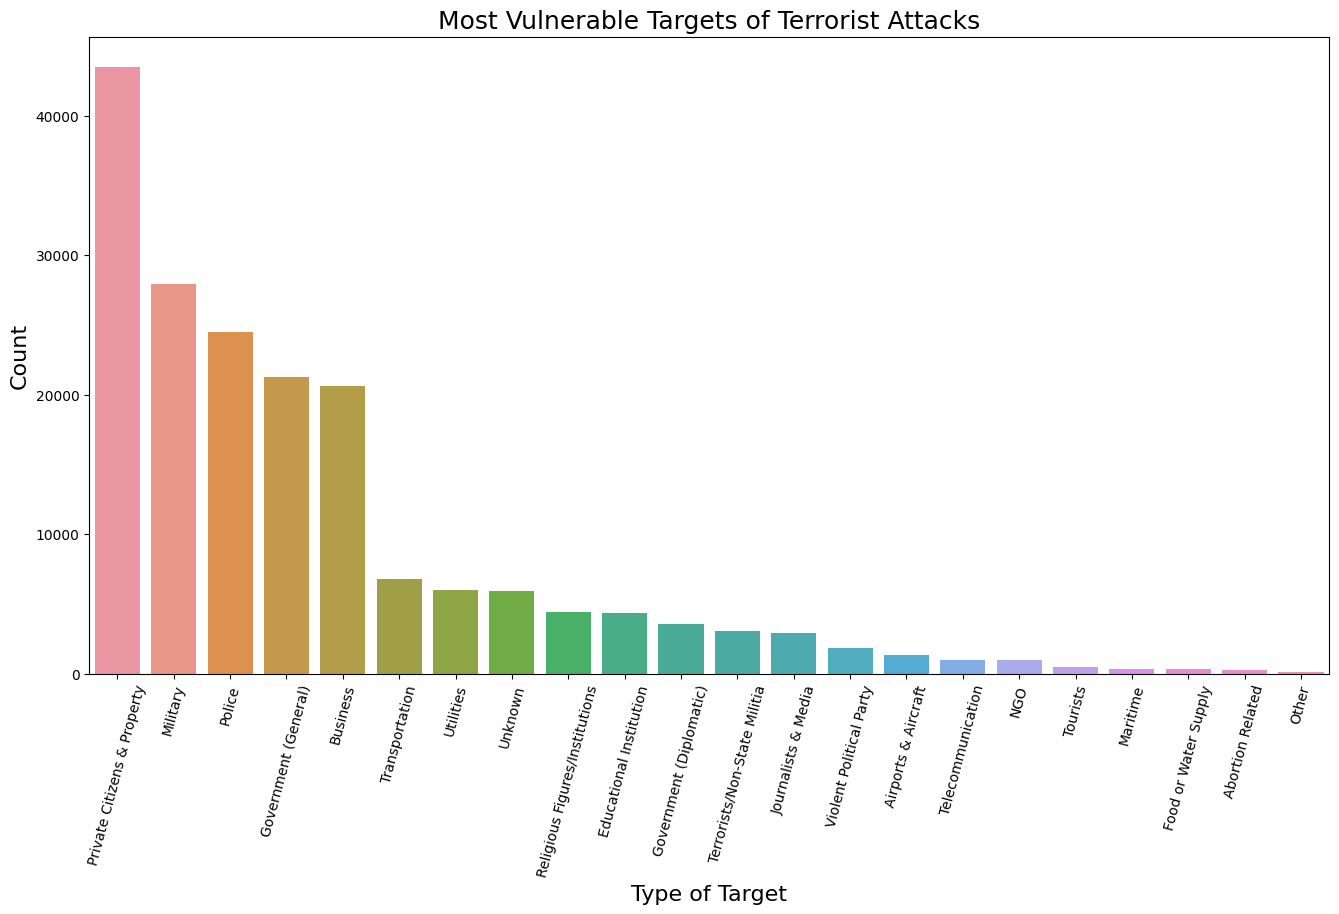

In [ ]:
# Set the size of the plot and create a bar chart showing the count of attacks by target type
plt.rcParams['figure.figsize'] = 16,8.27
target_counts = gta_df['TargetType'].value_counts()
target_counts_order = target_counts.index
target_plot = sns.countplot(x='TargetType', data=gta_df, order=target_counts_order)

# Add axis labels and a title to the plot
target_plot.set_xlabel('Type of Target', fontsize=16)
target_plot.set_ylabel('Count', fontsize=16)
target_plot.set_title('Most Vulnerable Targets of Terrorist Attacks', fontsize=18)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=75)


We can analyse from this bar graph that the most vulnerable are Private Citizens and Properties followed by Military and Police that is also evident from the fact that miltary and police are most exposed and have the responsibility to handle any type of attack.

## **Number of Terrorist Attacks in each Country**


Text(0.5, 1.0, 'Top 10 Countries with the Highest Number of Terrorist Attacks')

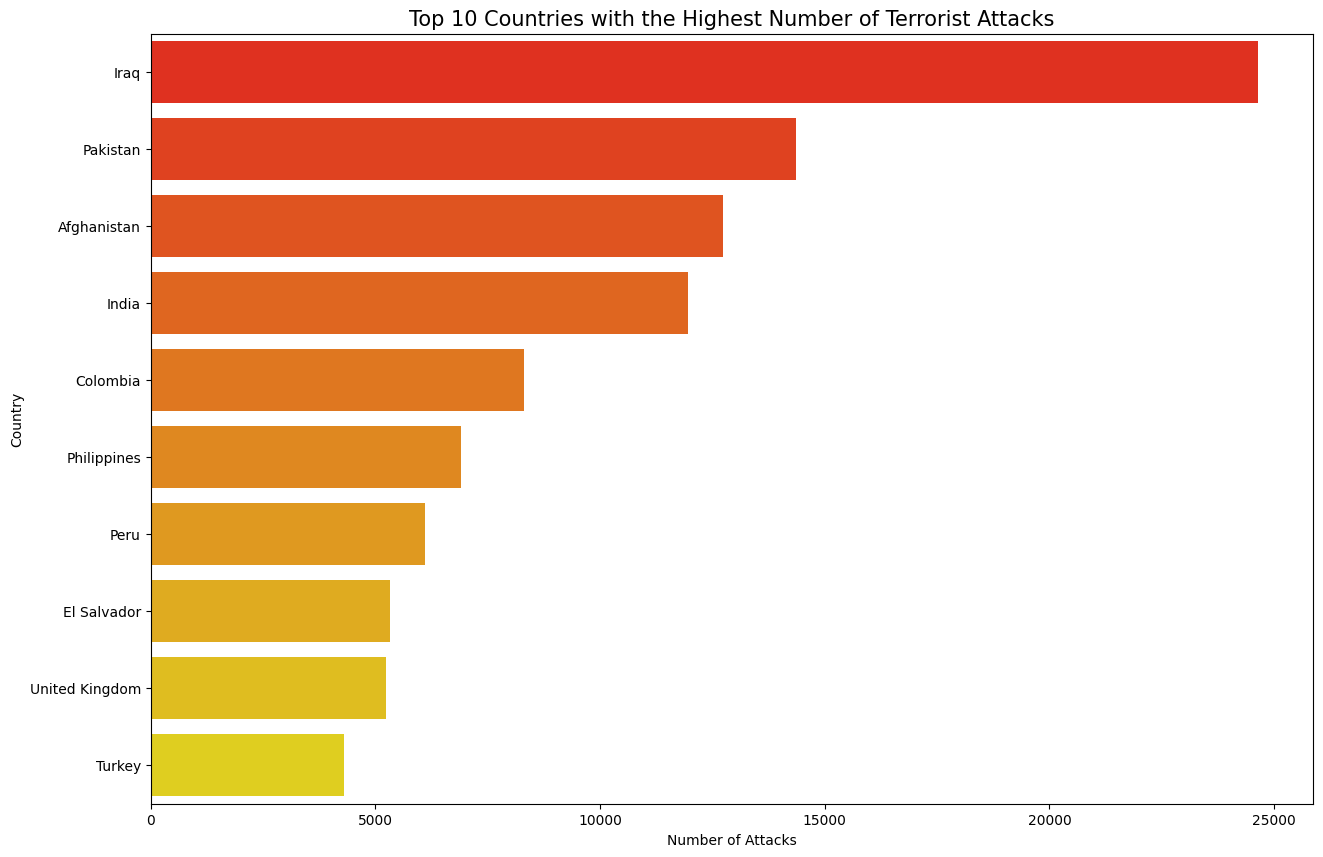

In [ ]:
# Create a bar chart showing the top 10 countries with the highest number of attacks
top_countries = gta_df['Country'].value_counts()[:10]
plt.figure(figsize=(15,10))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='autumn')

# Add axis labels and a title to the plot
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Number of Terrorist Attacks', size=15)


We can Analyse from this graph that the most vulnerable countries to terrorist attacks are Iraq and Pakistan followed by Afganistan and India and the least vulnerable Country is Turkey.
We can also analyse that nearly no country is left from these attacks Pakistan which is blamed everytime for giving shelter to the terrorists is also not spared by these attacks so we can say that Terrorism is not good for any country .

## **Number of attacks by Type of Organisation**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Taliban'),
  Text(0, 1, 'Islamic State of Iraq and the Levant (ISIL)'),
  Text(0, 2, 'Shining Path (SL)'),
  Text(0, 3, 'Farabundo Marti National Liberation Front (FMLN)'),
  Text(0, 4, 'Al-Shabaab'),
  Text(0, 5, "New People's Army (NPA)"),
  Text(0, 6, 'Irish Republican Army (IRA)'),
  Text(0, 7, 'Revolutionary Armed Forces of Colombia (FARC)'),
  Text(0, 8, 'Boko Haram'),
  Text(0, 9, "Kurdistan Workers' Party (PKK)"),
  Text(0, 10, 'Basque Fatherland and Freedom (ETA)'),
  Text(0, 11, 'Communist Party of India - Maoist (CPI-Maoist)'),
  Text(0, 12, 'Maoists'),
  Text(0, 13, 'Liberation Tigers of Tamil Eelam (LTTE)'),
  Text(0, 14, 'National Liberation Army of Colombia (ELN)'),
  Text(0, 15, 'Tehrik-i-Taliban Pakistan (TTP)'),
  Text(0, 16, 'Palestini

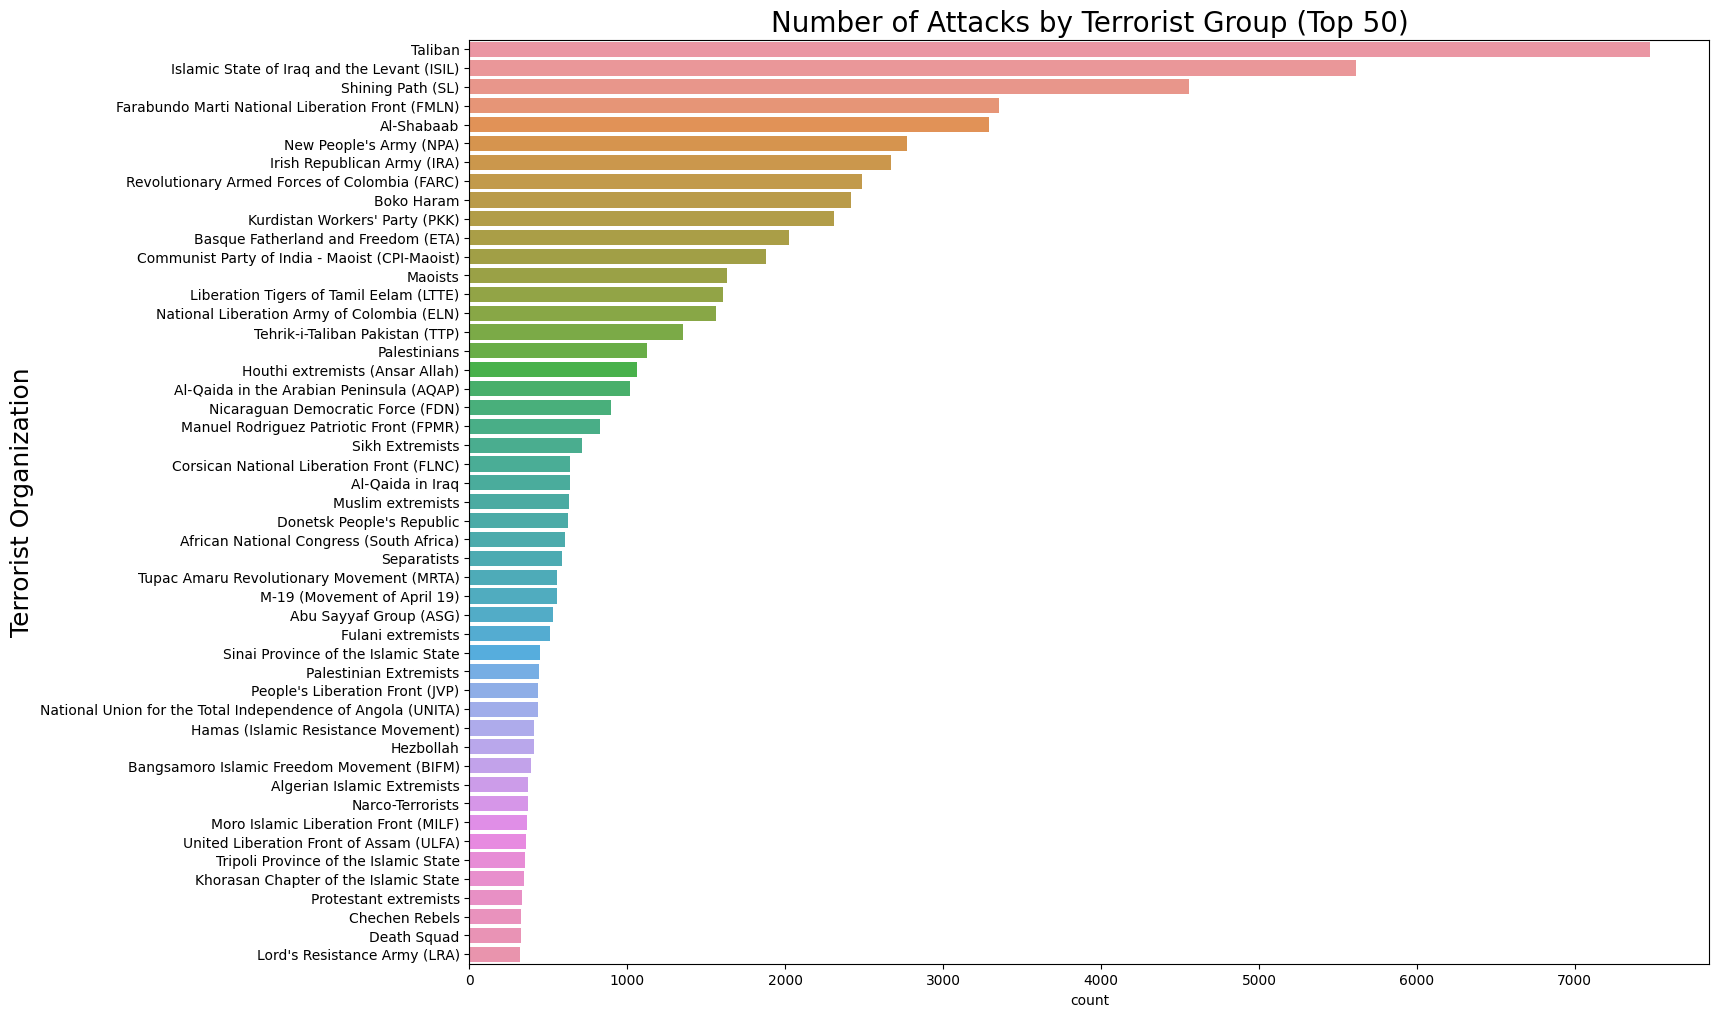

In [ ]:
# Set the size of the plot and create a bar chart showing the number of attacks by terrorist group
plt.rcParams['figure.figsize'] = 16,12
top_groups = gta_df['Group'].value_counts()[1:50]
group_plot = sns.countplot(y='Group', data=gta_df, order=top_groups.index)

# Add axis labels and a title to the plot
group_plot.set_ylabel('Terrorist Organization', fontsize=18)
group_plot.set_title('Number of Attacks by Terrorist Group (Top 50)', fontsize=20)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)


Hence we can analyse from this graph that the most number of terrorist attacks are done by Taliban which is followed by ISIL and SL so all the countries sercret agencies should have a close look on  the activities of these organisations in order to avoid future attacks.

### **Calculating success and failure rate of countries by analysing the success rate of stopping a terrorist attack**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brunei'),
  Text(1, 0, 'Ireland'),
  Text(2, 0, 'New Zealand'),
  Text(3, 0, 'Vietnam'),
  Text(4, 0, 'Comoros'),
  Text(5, 0, 'Grenada'),
  Text(6, 0, 'Romania'),
  Text(7, 0, 'North Yemen'),
  Text(8, 0, 'Cuba'),
  Text(9, 0, 'Czechoslovakia')])

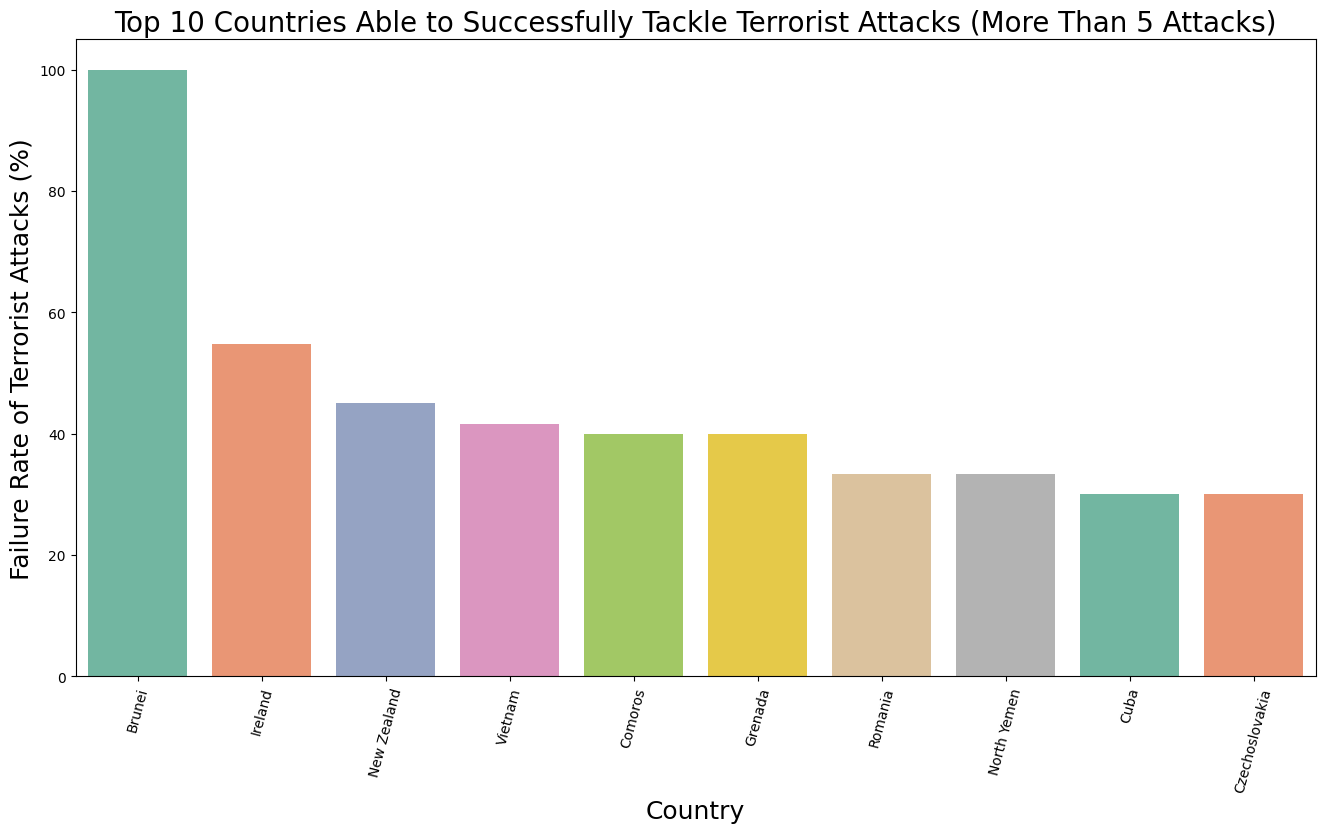

In [ ]:
# calculate failure rate of terrorist attacks by country
suceess_country = gta_df.groupby('Country').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns = ['country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed'] = suceess_country['Total_Attacks'] - suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack'] = (suceess_country['Attack_Failed'] / suceess_country['Total_Attacks']) * 100
suceess_country['Success_Rate_Attack'] = (suceess_country['Attack_Success'] / suceess_country['Total_Attacks']) * 100
suceess_country = suceess_country.round(2)

# select top 10 countries with highest failure rate of attacks
able_stop_terror_attack = suceess_country[suceess_country['Total_Attacks'] >= 5].sort_values('Failure_Rate_Attack', ascending=False)[:10]
plot_able_stop_terror_attack = able_stop_terror_attack.loc[:, ['country','Failure_Rate_Attack']]

# plot failure rate of top 10 countries
plt.figure(figsize=(16, 8.27))
ax = sns.barplot(x='country', y='Failure_Rate_Attack', data=plot_able_stop_terror_attack, palette='Set2')
ax.set_xlabel('Country', fontsize=18)
ax.set_ylabel('Failure Rate of Terrorist Attacks (%)', fontsize=18)
ax.set_title('Top 10 Countries Able to Successfully Tackle Terrorist Attacks (More Than 5 Attacks)', fontsize=20)
plt.xticks(rotation=75)


we can analyze from this graph that Brunei has successfuly tackled most of the terrorist attacks

Text(0.5, 1.0, 'Top 10 Countries Unable to Successfully Tackle Terrorist Attacks (More Than 5 Attacks)')

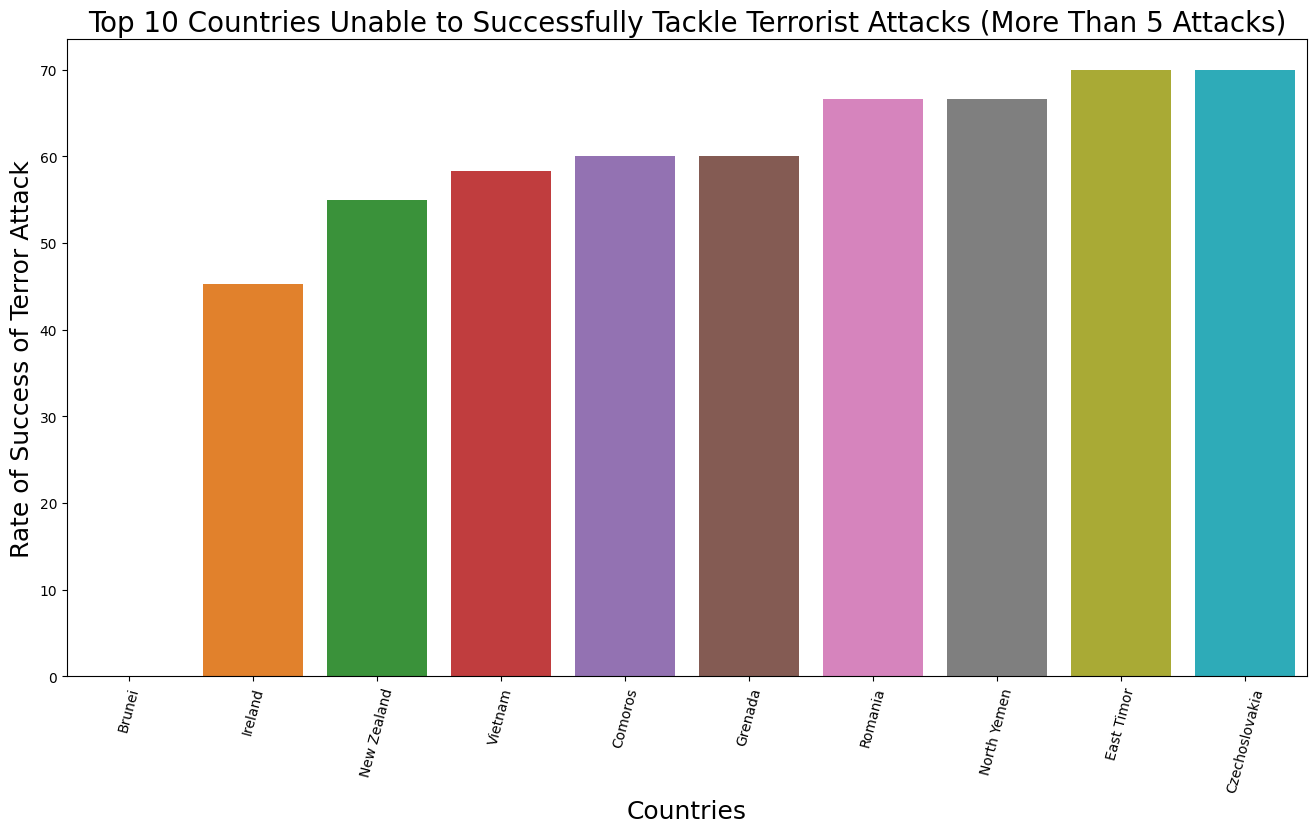

In [ ]:
# calculate success and failure rates of terrorist attacks by country
success_country = gta_df.groupby('Country').agg({'eventid': 'count', 'success': 'sum'}).reset_index()
success_country.columns = ['country', 'total_attacks', 'attack_success']
success_country['attack_failed'] = success_country['total_attacks'] - success_country['attack_success']
success_country['failure_rate_attack'] = (success_country['attack_failed'] / success_country['total_attacks']) * 100
success_country['success_rate_attack'] = (success_country['attack_success'] / success_country['total_attacks']) * 100
success_country = success_country.round(2)

# filter countries with more than 5 attacks and rank them by failure rate
unable_stop_terror_attack = success_country[success_country['total_attacks'] >= 5].sort_values('success_rate_attack')[:10]
plot_unable_stop_terror_attack = unable_stop_terror_attack.loc[:, ['country', 'success_rate_attack', 'total_attacks']]

# plot the results
ax = plt.rcParams['figure.figsize'] = 16, 8.27
ax = sns.barplot(x='country', y='success_rate_attack', data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries', fontsize=18)
plt.xticks(rotation=75)
ax.set_ylabel('Rate of Success of Terror Attack', fontsize=18)
ax.set_title('Top 10 Countries Unable to Successfully Tackle Terrorist Attacks (More Than 5 Attacks)', fontsize=20)


we can analyze from this graph that Czechoslovakia has unsuccessfuly tackled most of the terrorist attacks

**As we know that in recent times afghanistan has been worst affected from terrorism so i decided to have a detailed analysis of terrorism on Afganistan**

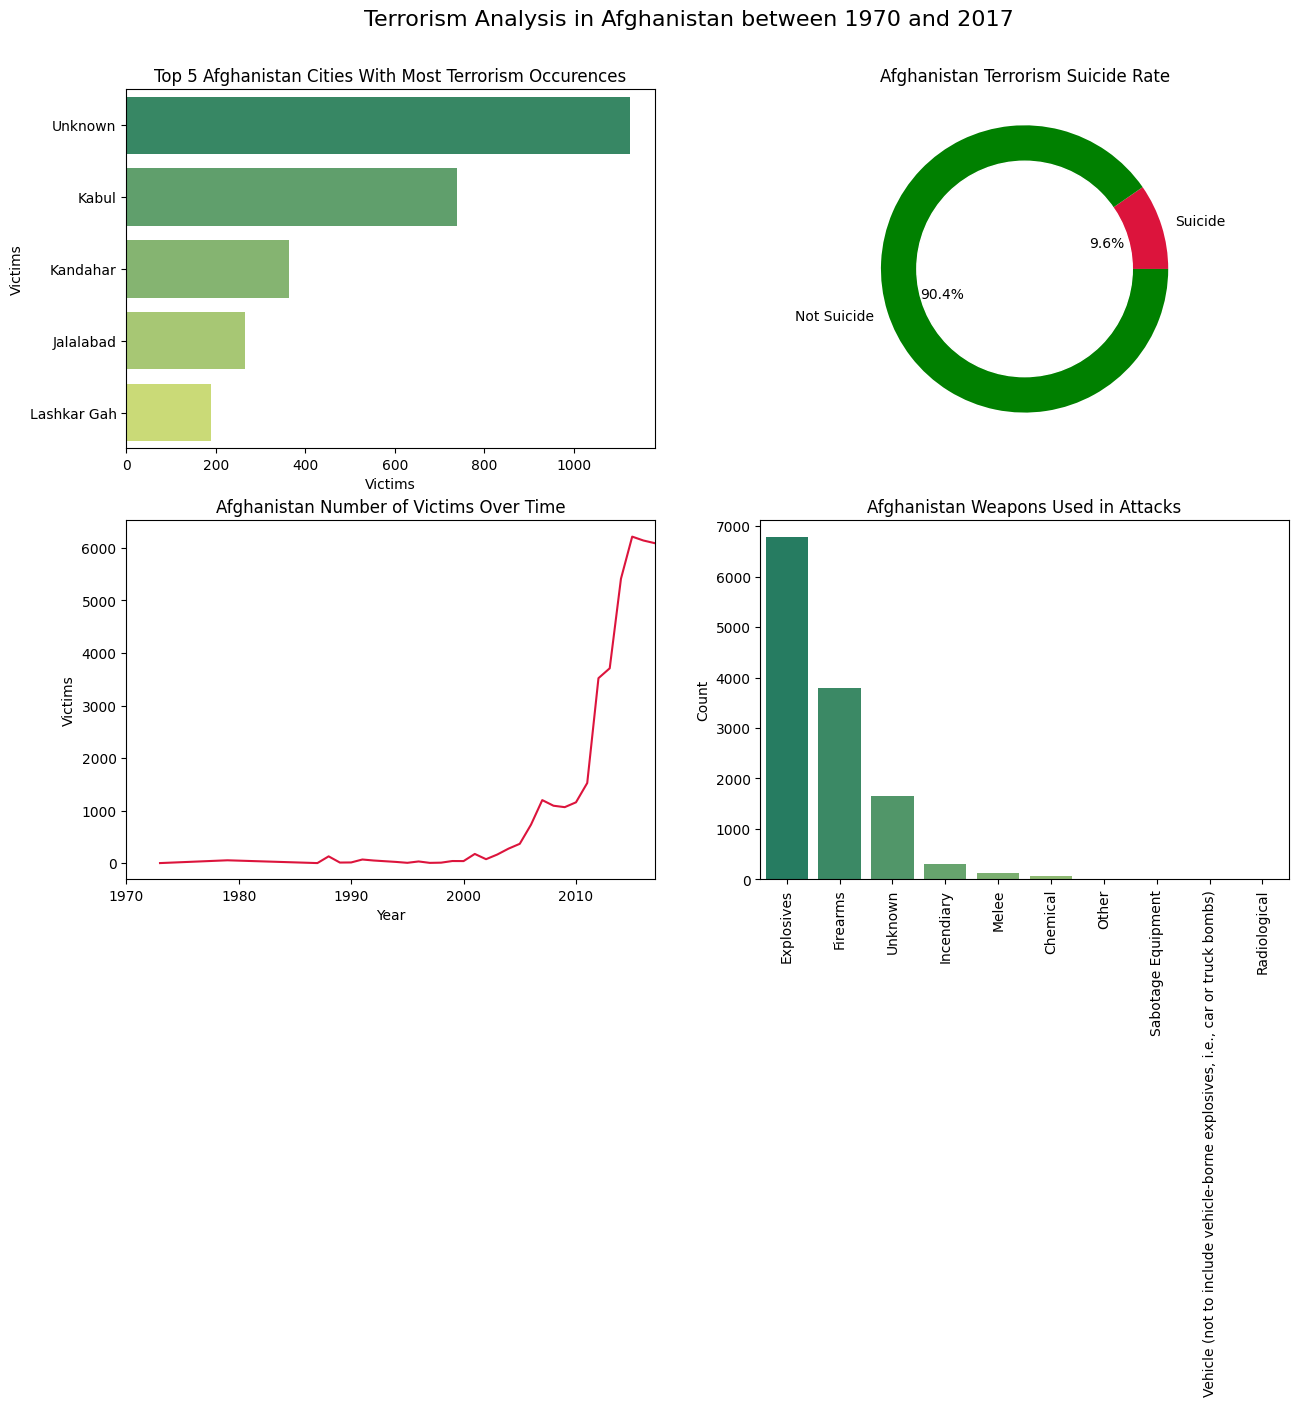

In [ ]:
#Preparing the data for analysis
Afghanistan = gta_df[gta_df.Country == 'Afghanistan']
Afghanistan_cities = Afghanistan.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Afghanistan_suicide_size = Afghanistan['suicide'].sum() / len(Afghanistan)
labels = ['Suicide', 'Not Suicide']

Afghanistan_year = Afghanistan.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Afghanistan_weapon = Afghanistan.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=Afghanistan_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Afghanistan Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Afghanistan_suicide_size, 1-Afghanistan_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Afghanistan Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Afghanistan_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Afghanistan Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Afghanistan_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Afghanistan Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Afghanistan between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()


1.unknown places in afghanistan have most of the terrorist attacks followed by kabul
2. afghanistan terrorism suicide rate is 9.6%
3.In Afghanistan number of victims from terrorist attacks have increased over time
4. Most weapon used in terrorist attacks are explosives

**Project Summary**

The Global Terrorism Database is a comprehensive dataset that contains information on terrorist attacks worldwide from 1970 to 2017. The dataset has 181,691 observations and 135 variables, covering details such as the date, location, type of attack, target type, weapon used, and casualties. The dataset was collected from various sources, including news articles, government reports, and public information.

The dataset requires extensive data cleaning and preprocessing to make it usable for analysis. The data contains missing values, inconsistent values, and redundant information, which needs to be addressed before conducting any analysis
I have completed a data analysis and visualization project using a global terrorism dataset. I used various libraries including NumPy, Pandas, Matplotlib, Seaborn, and Plotly to gain insights into the data.

First, I explored the number of global attacks per year, the types of terrorist attacks, and created a bar chart showing the number of bombings per year. Then, I created a cross-tabulation of attacks by year and region, and plotted it as a bar chart. Additionally, I created a bar chart showing the count of attacks by target type and the number of terrorist attacks in each country.

Next, I calculated the failure rate of terrorist attacks by country and identified the top 10 countries with the highest failure rate of attacks. 

I plotted the failure rate of the top 10 countries and also calculated the success and failure rates of terrorist attacks by country.

Furthermore, I filtered countries with more than 5 attacks and ranked them by failure rate, and prepared the data for analysis on Afghanistan. In this analysis, I included the top 5 terrorism cities, a plot of suicide rate, a plot of victims through the years, and a plot of terrorism weapons.

Overall, this project allowed me to gain valuable insights into global terrorism trends and patterns using data analysis and visualization techniques


**MY CONTRIBUTION**
I contributed to this project by providing my domain knowledge and expertise in data analysis. I actively participated in the data cleaning process, Identifying and handling missing or incorrect data.

During the exploratory data analysis, I suggested different types of visualizations and provided insights into the trends and patterns observed in the data. I also helped in interpreting the results and drawing meaningful conclusions based on the analysis performed.

My contributions were crucial in Identifying the key factors contributing to global terrorism and helped to create a better understanding of the overall impact of terrorism worldwide


**CONCLUSIONS**

Based on the analysis of the Global Terrorism Database, some conclusions that can be

drawn are:

1. Terrorism has been a global problem, with Incidents reported in nearly all countries.

2. The number of terrorist attacks Increased sharply after the 9/11 attacks in 2001, peaking In 2014 and declining slightly in recent years.

3. Iraq and Afghanistan have been the most affected countries by terrorism, with the highest number of attacks and fatalities.

4. Terrorist attacks are not evenly distributed across the world, with certain regions like the Middle East, South Asia, and North Africa being more affected.

5. Bombing/explosions are the most common type of terrorist attack, followed by armed assaults and assassinations.
6. Terrorist groups like the Tallban, Islamic State, and Boko Haram are responsible for the majority of attacks and fatalitles.

7. The analysis also indicates that there is a significant correlation between the number of terrorist Incidents and the number of fatalities.

8. Counterterrorism efforts by governments have resulted in a decrease in the number of terrorist Incidents In some countries, but the threat of terrorism remains a significant concern globally
